# Importing all the python libraries necessary to perform the tasks

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bs4

In [2]:
os.getcwd()

'C:\\Users\\Preksha\\Simplilearn\\Data Science with Python\\Telecom'

# Import data into Python environment.

In [3]:
dataset = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [4]:
dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
dataset.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [6]:
dataset.size

24464

In [7]:
dataset.shape

(2224, 11)

In [8]:
dataset.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [9]:
dataset.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [10]:
dataset.isna().any()

Ticket #                       False
Customer Complaint             False
Date                           False
Date_month_year                False
Time                           False
Received Via                   False
City                           False
State                          False
Zip code                       False
Status                         False
Filing on Behalf of Someone    False
dtype: bool

In [11]:
dataset.nunique()

Ticket #                       2224
Customer Complaint             1841
Date                             91
Date_month_year                  91
Time                           2190
Received Via                      2
City                            928
State                            43
Zip code                       1543
Status                            4
Filing on Behalf of Someone       2
dtype: int64

In [12]:
dataset['date_index'] = dataset['Date_month_year'] + " " + dataset['Time']

In [13]:
dataset['date_index'] = pd.to_datetime(dataset['date_index'])

In [14]:
dataset['Date_month_year'] = pd.to_datetime(dataset['Date_month_year'])

In [15]:
dataset = dataset.set_index(dataset['date_index'])

In [16]:
dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


# Provide the trend chart for the number of complaints at monthly and daily granularity levels.

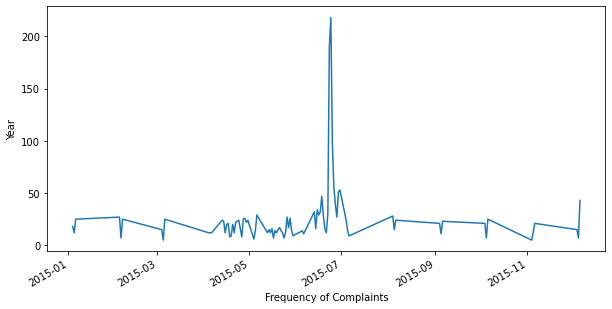

In [17]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.xlabel('Frequency of Complaints')
plt.ylabel('Year')
dataset['Date_month_year'].value_counts().plot();

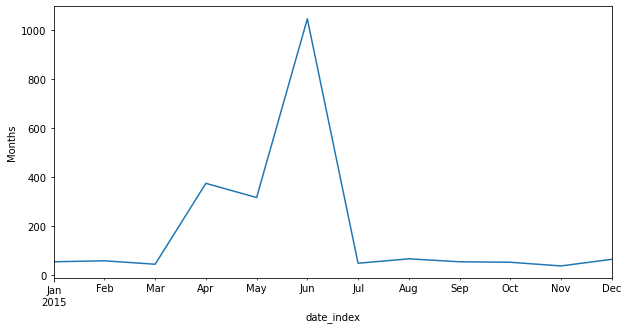

In [18]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.xlabel('Frequency of Complaints')
plt.ylabel('Months')
dataset.groupby(pd.Grouper(freq = 'M')).size().plot();

# Provide a table with the frequency of complaint types.

In [19]:
complaints = dataset['Customer Complaint'].str.upper().value_counts()

In [20]:
complaints

COMCAST                                    102
COMCAST DATA CAP                            30
COMCAST INTERNET                            29
COMCAST DATA CAPS                           21
COMCAST BILLING                             18
                                          ... 
COMCAST BILL AND SERVICE DISCLOSURE          1
OVER BILLING ISSUES                          1
CABLE MODEM RENT FOR INTERNET ACCESS         1
NO WARNING BEFORE PRICE INCREASE             1
COMCAST THROTTLING SPEEDS AND DATA CAPS      1
Name: Customer Complaint, Length: 1740, dtype: int64

Since the dataset has so many categories, the table will display only the top 10 and lowest 10 values individually

In [21]:
complaints.head(10)

COMCAST                     102
COMCAST DATA CAP             30
COMCAST INTERNET             29
COMCAST DATA CAPS            21
COMCAST BILLING              18
COMCAST SERVICE              15
INTERNET SPEED               15
DATA CAPS                    13
UNFAIR BILLING PRACTICES     13
DATA CAP                     12
Name: Customer Complaint, dtype: int64

In [22]:
complaints.tail(10)

MONOPOLISTIC BILLING                                                               1
PAYING FOR HIGH SPEED INTERNET WITH COMCAST. CONSISTENTLY GETTING SLOW SERVICE.    1
COMCAST DATA USAGE                                                                 1
COMCAST CABLE IN MARYLAND                                                          1
CHARGING FOR SERVICE WITH OUT FIXING THE PROBLEM                                   1
COMCAST BILL AND SERVICE DISCLOSURE                                                1
OVER BILLING ISSUES                                                                1
CABLE MODEM RENT FOR INTERNET ACCESS                                               1
NO WARNING BEFORE PRICE INCREASE                                                   1
COMCAST THROTTLING SPEEDS AND DATA CAPS                                            1
Name: Customer Complaint, dtype: int64

1. The maximum complaint types are COMCAST, COMCAST DATA CAP and COMCAST INTERNET as seen in the above output

# Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [23]:
dataset.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [24]:
dataset['New_Status'] = ['Open' if Status=='Open' or Status=='Pending' else 'Closed' for Status in dataset['Status']]

In [25]:
dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,New_Status
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,Closed


In [26]:
dataset.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
New_Status                             object
dtype: object

# Provide state wise status of complaints in a stacked bar chart

In [27]:
dataset.New_Status.unique()

array(['Closed', 'Open'], dtype=object)

# Which state has the maximum complaints - Georgia

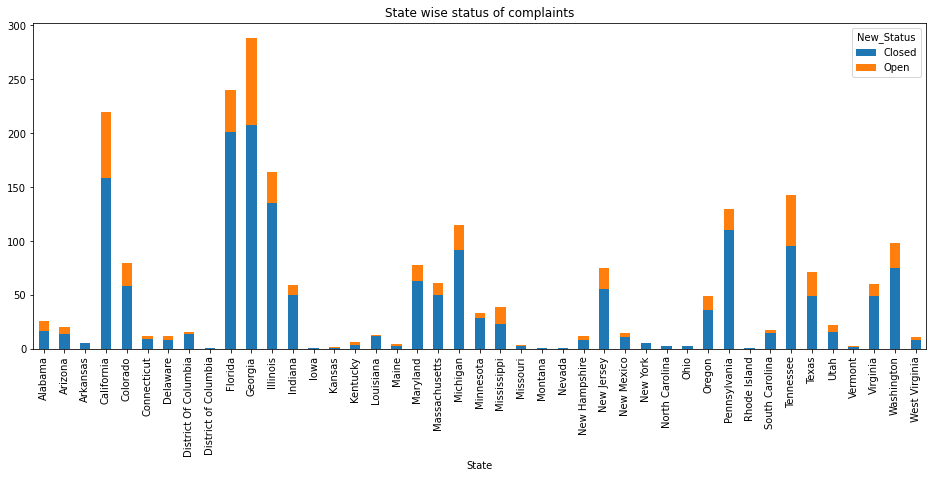

In [28]:
pd.crosstab(dataset.State,dataset.New_Status).plot(kind='bar',figsize=(16,6),
                                                      stacked=True,
                                                      title='State wise status of complaints');

As seen in the graph, Georgia is the state with maximum number of complaints

# Which state has the highest percentage of unresolved complaints - Georgia

In [29]:
Unresolved_complaints = dataset[dataset['New_Status']=='Open'].State.value_counts()

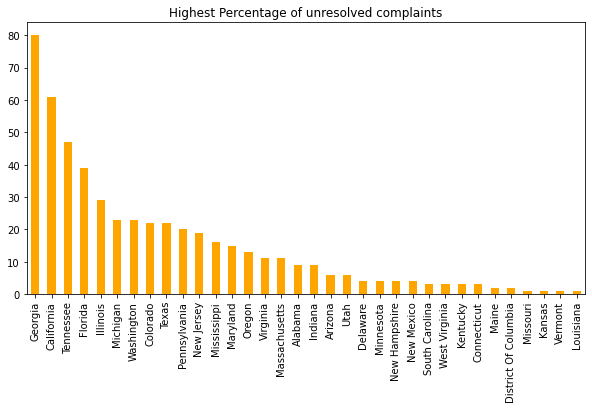

In [30]:
Unresolved_complaints.plot(kind='bar', figsize=(10,5), color='orange')
plt.title('Highest Percentage of unresolved complaints');

As seen in the graph, Georgia is the state highest percentage of unresolved complaints

# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [31]:
dataset['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [32]:
dataset.New_Status.value_counts()

Closed    1707
Open       517
Name: New_Status, dtype: int64

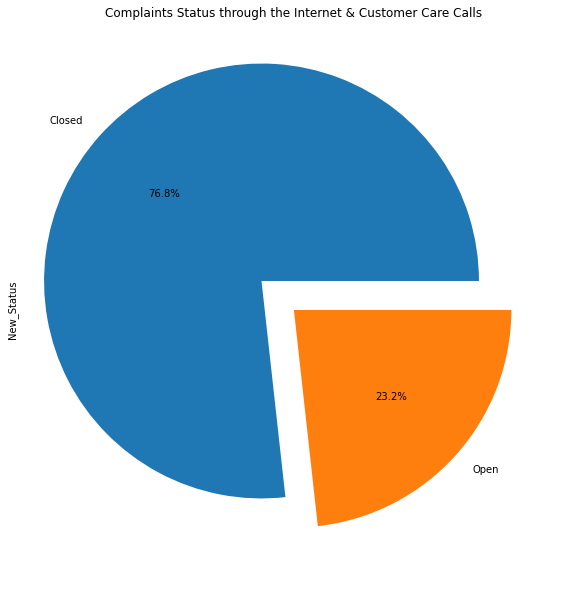

In [33]:
myexplode = [0.2, 0]
plt.title('Complaints Status through the Internet & Customer Care Calls\n')
dataset.New_Status.value_counts().plot(kind='pie',explode = myexplode,autopct='%1.1f%%', figsize = (20,10));

The percentage of complaints closed till date is 76.5% and the ones that are still open consist 23.4% of total complaints.